# <span style="color:orange"> Notebook for generating figures of MR Sim Inputs // *For SC QSM* </span> </br>
We want to load the PD, Chi, T1 and T2* maps and show one slice with a nice colorbar 

In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from utils.extract_metric import extract_metrics

In [2]:
import utils.mrsim_inputs_display_slice
import importlib
importlib.reload(utils.mrsim_inputs_display_slice)

<module 'utils.mrsim_inputs_display_slice' from 'c:\\Users\\Admin\\Documents\\msc_project\\Image-processing-strategies\\MRsim\\utils\\mrsim_inputs_display_slice.py'>

Now, to enable iteractive windows:

In [23]:
%matplotlib qt

In [3]:
import matplotlib.pyplot as plt
print(plt.colormaps())


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [4]:
# Load the mask data for metric auto-calculation with image
wm_mask_path = r"E:\msc_data\sc_qsm\final_gauss_sims\masks\sc_wm_crop.nii.gz"
gm_mask_path = r"E:\msc_data\sc_qsm\final_gauss_sims\masks\sc_gm_crop.nii.gz"
utils.mrsim_inputs_display_slice.load_gm_wm_masks(gm_mask_path, wm_mask_path)

## <span style="color:#EF9A9A"> PD, T1, T2* and Chi map </span> </br>
The PD map varies from 0 to 100 based on water content </br>

In [14]:
pd_cropped_path = r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\MRsim_inputs\/cropping/gauss_pd_sc_swiss_crop.nii.gz"
sus_cropped_path = r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\MRsim_inputs\cropping/gauss_sus_sc_swiss_crop.nii.gz"
t1_cropped_path = r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\MRsim_inputs\cropping/gauss_t1_sc_swiss_crop.nii.gz"
t2s_cropped_path = r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\MRsim_inputs\cropping/gauss_t2s_sc_swiss_crop.nii.gz"
t2_cropped_path = r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\MRsim_inputs\cropping/gauss_t2_sc_swiss_crop.nii.gz"

In [16]:
pd_cropped_map_data = nib.load(pd_cropped_path).get_fdata()
sus_cropped_map_data = nib.load(sus_cropped_path).get_fdata()
t1_cropped__map_data = nib.load(t1_cropped_path).get_fdata()
t2s_cropped_map_data = nib.load(t2s_cropped_path).get_fdata()
t2_cropped_map_data = nib.load(t2_cropped_path).get_fdata()

In [ ]:
pd_cropped_map_data.shape

(301, 351, 128)

In [24]:
utils.mrsim_inputs_display_slice.display_quantMap(t1_cropped__map_data, map_type = 't1', cut='axial', colormap="winter", img_class="custom", slice_index=80, cmap_min=20, cmap_max=100)

Selected zoom region: x=(110,206), y=(140,226)
GM Mean: 978.8007 ppm
WM Mean: 857.0549 ppm


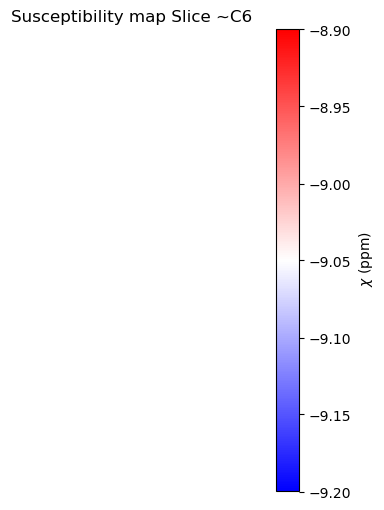

GM Mean: -9.0293 ppm
WM Mean: -9.0831 ppm


In [30]:
utils.mrsim_inputs_display_slice.display_wb_quantMap(sus_wb_map_data, map_type = 'sus', cut='sagittal',colormap="bwr", img_class="sim_ideal", slice_index=216, cmap_min=-9.2, cmap_max=-8.90)

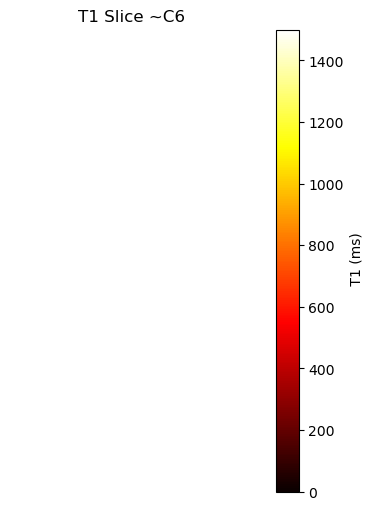

GM Mean: 978.8007 ppm
WM Mean: 857.0549 ppm


In [28]:
utils.mrsim_inputs_display_slice.display_wb_quantMap(t1_wb_map_data, map_type = 't1', cut='sagittal',colormap="hot", img_class="sim_ideal", slice_index=216, cmap_min=0, cmap_max=1500)

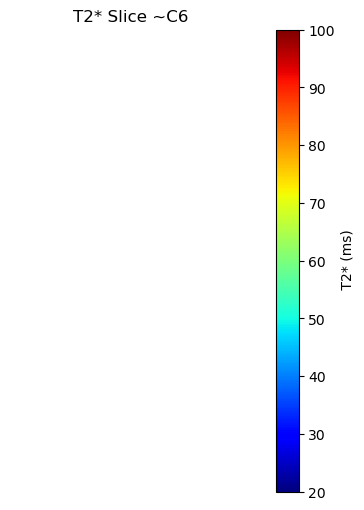

GM Mean: -9.0293 ppm
WM Mean: -9.0831 ppm


In [29]:
utils.mrsim_inputs_display_slice.display_wb_quantMap(sus_wb_map_data, map_type = 't2s', cut='sagittal',colormap="jet", img_class="sim_ideal", slice_index=216, cmap_min=20, cmap_max=100)

# Ideas for more figures </br>
Now, lets create some useful plots to show that validate our simulated images

In [3]:
# Loading cropped realistic simulated magnitude and phase
cropped_mag_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\mrsim_outputs\custom_params\gauss_crop_sim_mag_pro.nii.gz").get_fdata()
cropped_phase_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\August_2025\mrsim_outputs\custom_params\gauss_crop_sim_ph_pro.nii.gz").get_fdata()

In [4]:
echo_list = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40] 
pt1 = (153, 219, 10)  # trachea
pt2 = (153, 161, 19)  # inside SC

In [7]:
def plot_voxel_signal(mag, phase, TEs, pt1, pt2):
    mag_at_point1 = mag[pt1]
    phase_at_point1 = phase[pt1]

    mag_at_point2 = mag[pt2]
    phase_at_point2 = phase[pt2]

    plt.figure(figsize=(10,4))

    # --- Magnitude ---
    plt.subplot(1,2,1)
    plt.plot(TEs, mag_at_point1, 'o-', color="#52BFB4", label="Trachea")
    plt.plot(TEs, mag_at_point2, 'o-', color="#52BF59", label="Spinal Cord")
    plt.xlabel('Echo time (ms)')
    plt.ylabel('Magnitude (Intensity)')
    plt.title('Magnitude decay')
    plt.grid(True)
    plt.legend()

    # --- Phase ---
    plt.subplot(1,2,2)
    plt.plot(TEs, phase_at_point1, 'o-', color="#52BFB4", label="Trachea")
    plt.plot(TEs, phase_at_point2, 'o-', color="#52BF59", label="Spinal Cord")
    plt.xlabel('Echo time (ms)')
    plt.ylabel('Phase (radians)')
    plt.title('Phase evolution')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


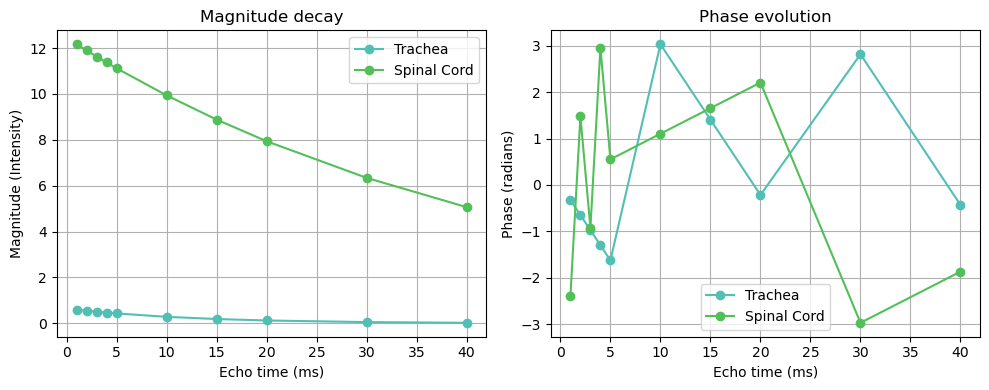

In [8]:
plot_voxel_signal(cropped_mag_data, cropped_phase_data, echo_list, pt1, pt2)